# DataScience Incendios de Australia

En esta practica se nos pide un estudio de Analisis de Datos sobre los ultimos **incendios producidos en Australia**. Se nos facilita un Dataset donde debemos realziar los siguientes puntos.

* Cargar el DataSet
* Realizar un estudio de DataCleaning
    * Localizar valores nulos
    * Despreciar valores (si lo consideras oportuno)
    * Creación de Variables Dummies
* Guardar el Dataset "Limpio" con otro nombre para identificarlo
* Estudio de los Datos mediante gráficos (Los gráficos deben estar explicados y bien etiquetados) 
    * Histograma
    * Barras
    * Grafico de Puntos
* Filtra Dataset por los datos necesarios para el estudio (según vuestro criterio como analistas)
* Mostrar los datos usando un Mapa Gráfico
    * Usar marcación de puntos mediante Cluster

### Información del Dataset

#### Columnas

* Latitude: Center of 1km fire pixel but not necessarily the actual location of the fire as one or more fires can be detected within the 1km pixel.

* Longitude: Center of 1km fire pixel but not necessarily the actual location of the fire as one or more fires can be detected within the 1km pixel.

* Brightness temperature 21 (Kelvin): Channel 21/22 brightness temperature of the fire pixel measured in Kelvin.

* Scan pixel size: The algorithm produces 1km fire pixels but MODIS pixels get bigger toward the edge of scan. Scan and track reflect actual pixel size.

* Track pixel size: The algorithm produces 1km fire pixels but MODIS pixels get bigger toward the edge of scan. Scan and track reflect actual pixel size.

* Acquisition Date: Date of MODIS acquisition.

* Acquisition Time: Time of acquisition/overpass of the satellite (in UTC).

* Satellite: A = Aqua and T = Terra.

* Instrument: Constant value for MODIS.

* Confidence (0-100%): This value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels. Confidence estimates range between 0 and 100% and are assigned one of the three fire classes (low-confidence fire, nominal-confidence fire, or high-confidence fire).

* Version (Collection and source): Version identifies the collection (e.g. MODIS Collection 6) and source of data processing: Near Real-Time (NRT suffix added to collection) or Standard Processing (collection only). "6.0NRT" - Collection 6 NRT processing. "6.0" - Collection 6 Standard processing. Find out more on collections and on the differences between FIRMS data sourced from LANCE FIRMS and University of Maryland.

* Brightness temperature 31 (Kelvin): Channel 31 brightness temperature of the fire pixel measured in Kelvin.

* Fire Radiative Power: Depicts the pixel-integrated fire radiative power in MW (megawatts).

* Day / Night: D = Daytime, N = Nighttime

# Se trabaja con un dataset sobre los incendios ocurridos en Australia entre agosto y septiembre de 2019

## Primero se limpia el Dataset

In [1]:
#Cargamos la libreria
import pandas as pd

In [2]:
#Se carga el  Dataset de incendios 
australia=pd.read_csv("Datasets/Fire_Australia.csv")

In [3]:
# Se revisa qué datos se tienen 
australia.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0

In [4]:
australia.shape

(36011, 15)

In [5]:
#Se observan el número de valores nulos que aparecen
australia.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

#### Al no haber ningún valor nulo, se decidirá si toda la información proporcionada por el dataset es necesaria 

In [6]:
australia.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0

Se observa junto a la información previamente dada que una columna, MODIS, es constante, y por ello no proporciona ninguna información variada

In [7]:
#Se procede a la eliminación de la columna
australia=australia.drop(["instrument"],axis=1)
australia.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite  confidence  version  bright_t31   frp daynight  type  
0     Terra          48      6.3       297.3   6.6        D     0  
1     Terra          71      6.3       297.3  11.3        D     0  
2     Terra          42      6.3       298.7  23.1        D     0  
3     Terra          33      6.3       296.1   6.5        D     0  
4     Terra          36      6.3       298.8  27.6        D     0

Version también se mantiene constante a lo largo de la tabla

In [8]:
australia=australia.drop(["version"],axis=1)
australia.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite  confidence  bright_t31   frp daynight  type  
0     Terra          48       297.3   6.6        D     0  
1     Terra          71       297.3  11.3        D     0  
2     Terra          42       298.7  23.1        D     0  
3     Terra          33       296.1   6.5        D     0  
4     Terra          36       298.8  27.6        D     0

#### Se crean variables dummies 

In [9]:
australia_daynight=pd.get_dummies(australia["daynight"],prefix="time")

In [10]:
australia_daynight.head()

time_D  time_N
0       1       0
1       1       0
2       1       0
3       1       0
4       1       0

In [11]:
#Se une al dataset
australia=pd.concat([australia,australia_daynight], axis=1)
australia.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite  confidence  bright_t31   frp daynight  type  time_D  time_N  
0     Terra          48       297.3   6.6        D     0       1       0  
1     Terra          71       297.3  11.3        D     0       1       0  
2     Terra          42       298.7  23.1        D     0       1       0  
3     Terra          33       296.1   6.5        D     0       1       0  
4     Terra          36       298.8  27.6        D     0       1       0

In [12]:
#Se borra la columna de daynight para no repetir datos
australia=australia.drop(["daynight"],axis=1)
australia.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite  confidence  bright_t31   frp  type  time_D  time_N  
0     Terra          48       297.3   6.6     0       1       0  
1     Terra          71       297.3  11.3     0       1       0  
2     Terra          42       298.7  23.1     0       1       0  
3     Terra          33       296.1   6.5     0       1       0  
4     Terra          36       298.8  27.6     0       1       0

In [13]:
#Se crea otra variable dummy
australia_satellite=pd.get_dummies(australia["satellite"],prefix="sat")
australia_satellite.head()

sat_Aqua  sat_Terra
0         0          1
1         0          1
2         0          1
3         0          1
4         0          1

In [14]:
#Unir variable con dataset 
australia=pd.concat([australia,australia_satellite], axis=1)
australia.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite  confidence  bright_t31   frp  type  time_D  time_N  sat_Aqua  \
0     Terra          48       297.3   6.6     0       1       0         0   
1     Terra          71       297.3  11.3     0       1       0         0   
2     Terra          42       298.7  23.1     0       1       0         0   
3     Terra          33       296.1   6.5     0       1       0         0   
4     Terra          36       298.8  27.6     0       1       0         0   

   sat_Terra  
0          1  
1          1  
2          1  
3          1  
4          1

In [15]:
#Eliminar columna satellite
australia=australia.drop(["satellite"],axis=1)
australia.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

   confidence  bright_t31   frp  type  time_D  time_N  sat_Aqua  sat_Terra  
0          48       297.3   6.6     0       1       0         0          1  
1          71       297.3  11.3     0       1       0         0          1  
2          42       298.7  23.1     0       1       0         0          1  
3          33       296.1   6.5     0       1       0         0          1  
4          36       298.8  27.6     0       1       0         0          1

#### Se guarda el dataset limpiado

In [16]:
australia.to_csv("Datasets/australia_cleaned.csv")

## Segundo se hace un estudio a través de gráficos

In [17]:
# se cargan las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Se caraga el dataset limpiado
australia=pd.read_csv("Datasets/australia_cleaned.csv")
australia.head()

Unnamed: 0  latitude  longitude  brightness  scan  track    acq_date  \
0           0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01   
1           1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01   
2           2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01   
3           3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01   
4           4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01   

   acq_time  confidence  bright_t31   frp  type  time_D  time_N  sat_Aqua  \
0        56          48       297.3   6.6     0       1       0         0   
1        56          71       297.3  11.3     0       1       0         0   
2        57          42       298.7  23.1     0       1       0         0   
3        57          33       296.1   6.5     0       1       0         0   
4        57          36       298.8  27.6     0       1       0         0   

   sat_Terra  
0          1  
1          1  
2          1  
3          1  
4          1

#### Se realizará un histograma

Text(0.5, 1.0, 'Gráfico que relaciona la confianza de los fuegos')

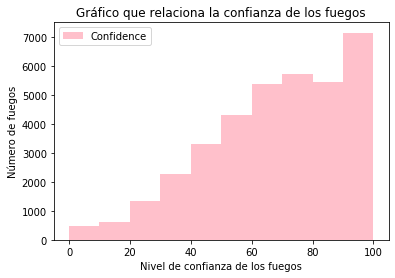

In [19]:

plt.hist(australia["confidence"],label="Confidence",color="pink")
plt.legend()
plt.xlabel("Nivel de confianza de los fuegos")
plt.ylabel("Número de fuegos")
plt.title("Gráfico que relaciona la confianza de los fuegos")



#### Se realiza un diagrama de puntos

Text(0.5, 1.0, 'Diagrama de puntos, relación entre la confianza y la luminosidad 21')

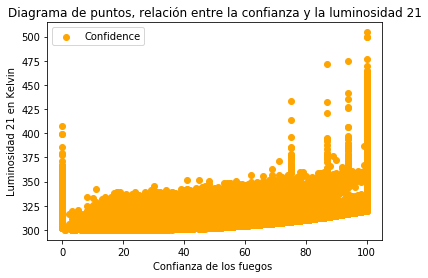

In [20]:
plt.scatter(australia["confidence"],australia ["brightness"], label ="Confidence", color="orange")
plt.legend()
plt.ylabel("Luminosidad 21 en Kelvin")
plt.xlabel("Confianza de los fuegos ")
plt.title("Diagrama de puntos, relación entre la confianza y la luminosidad 21")

Text(0.5, 1.0, 'Diagrama de puntos, relación entre la confianza y la luminosidad 31')

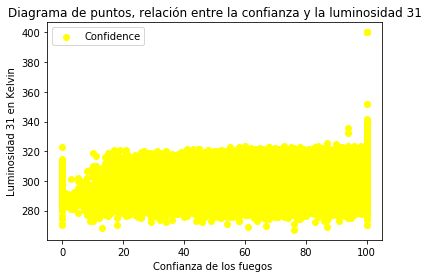

In [21]:
plt.scatter(australia["confidence"],australia ["bright_t31"], label ="Confidence", color="yellow")
plt.legend()
plt.ylabel("Luminosidad 31 en Kelvin")
plt.xlabel("Confianza de los fuegos ")
plt.title("Diagrama de puntos, relación entre la confianza y la luminosidad 31")

##### Se realiza un diagrama de barras 

Text(0.5, 0, 'Tipo de fuego, nocturno o diurno')

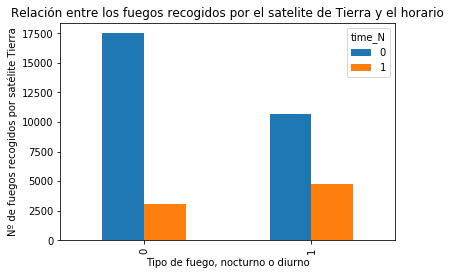

In [22]:
pd.crosstab(australia["sat_Terra"], australia["time_N"]).plot(kind="bar")
plt.title("Relación entre los fuegos recogidos por el satelite de Tierra y el horario")
plt.ylabel("Nº de fuegos recogidos por satélite Tierra")
plt.xlabel("Tipo de fuego, nocturno o diurno")

## Tercero, se filtra el dataset

In [23]:
#Se importan las librerias necesarias 
import pandas as pd
import folium
from folium.plugins import MarkerCluster

#### Se busca saber la fecha de aquellos fuegos con una confianza mayor a 70 %

In [24]:
australia_1=pd.read_csv("Datasets/australia_cleaned.csv")
australia_1.head()

Unnamed: 0  latitude  longitude  brightness  scan  track    acq_date  \
0           0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01   
1           1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01   
2           2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01   
3           3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01   
4           4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01   

   acq_time  confidence  bright_t31   frp  type  time_D  time_N  sat_Aqua  \
0        56          48       297.3   6.6     0       1       0         0   
1        56          71       297.3  11.3     0       1       0         0   
2        57          42       298.7  23.1     0       1       0         0   
3        57          33       296.1   6.5     0       1       0         0   
4        57          36       298.8  27.6     0       1       0         0   

   sat_Terra  
0          1  
1          1  
2          1  
3          1  
4          1

In [25]:
fecha=australia_1[(australia_1["confidence"]>= 70)]
fecha.head()

Unnamed: 0  latitude  longitude  brightness  scan  track    acq_date  \
1            1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01   
7            7  -14.3195   143.5198       322.9   1.2    1.1  2019-08-01   
8            8  -13.1654   141.9715       317.2   1.0    1.0  2019-08-01   
12          12  -12.7626   142.1759       335.2   1.0    1.0  2019-08-01   
21          21  -12.6491   134.3953       324.9   2.4    1.5  2019-08-01   

    acq_time  confidence  bright_t31   frp  type  time_D  time_N  sat_Aqua  \
1         56          71       297.3  11.3     0       1       0         0   
7         57          79       290.9  20.4     0       1       0         0   
8         57          72       300.0   9.9     0       1       0         0   
12        57          88       301.7  30.1     0       1       0         0   
21        57          79       300.6  57.7     0       1       0         0   

    sat_Terra  
1           1  
7           1  
8           1  
12          1  
21          1

In [26]:
fecha.shape

(18314, 16)

Se dibuja un mapa con la informacón obtenida

In [27]:
#Se dibuja el mapa de autralia : -25.274398	133.775136
mapa=folium.Map([-25.274398,133.775136],zoom_start=4.5,tiles='Stamen Terrain')
mapa

In [28]:
#Se crean las listas de longitud y latitud 
lat=fecha["latitude"].values.tolist()
long=fecha["longitude"].values.tolist()

In [29]:
#Se crea el Cluster y se añade al  mapa
australia_cluster = MarkerCluster().add_to(mapa)

In [30]:
for lat,long in zip(lat,long):
    folium.Marker([lat,long]).add_to(australia_cluster)

In [31]:
#se dibuja el mapa
mapa

#### Se busca saber la localización del fuego con frp mayor que 3000 MW

In [32]:
localizacion=australia_1[(australia_1["frp"]>= 3000)]
localizacion.head()

Unnamed: 0  latitude  longitude  brightness  scan  track    acq_date  \
26149       26149  -29.8253   152.0949       469.1   2.5    1.5  2019-09-12   

       acq_time  confidence  bright_t31     frp  type  time_D  time_N  \
26149       418         100       327.2  3679.5     0       1       0   

       sat_Aqua  sat_Terra  
26149         1          0

In [33]:
#Se dibuja el mapa
mapa_2=folium.Map([-25.274398,133.775136],zoom_start=4.5,tiles='Stamen Terrain')

In [34]:
lat_2=localizacion["latitude"].values.tolist()
long_2=localizacion["longitude"].values.tolist()

In [35]:
australia_cluster_2= MarkerCluster().add_to(mapa_2)

In [36]:
for lat_2,long_2 in zip(lat_2,long_2):
    folium.Marker([lat_2,long_2]).add_to(australia_cluster_2)

In [37]:
mapa_2

Se quieren conocer los fuegos ocurridos en septiembre 2019

In [14]:
mes=australia_1[(australia_1["acq_date"]>= "2019-09-01")]
mes.head()

Unnamed: 0  latitude  longitude  brightness  scan  track    acq_date  \
16254       16254  -12.3194   142.0480       312.2   4.2    1.9  2019-09-01   
16255       16255  -12.3168   142.0542       311.4   4.2    1.9  2019-09-01   
16256       16256  -12.3407   142.0894       310.2   4.2    1.9  2019-09-01   
16257       16257  -12.3266   142.0863       310.1   4.2    1.9  2019-09-01   
16258       16258  -12.4983   142.0457       317.1   4.2    1.9  2019-09-01   

       acq_time  confidence  bright_t31   frp  type  time_D  time_N  sat_Aqua  \
16254        14          53       297.1  48.3     0       1       0         0   
16255        14          23       297.0  40.2     0       1       0         0   
16256        14          18       296.9  33.5     0       1       0         0   
16257        14          27       296.7  36.0     0       1       0         0   
16258        14          58       298.2  71.9     0       1       0         0   

       sat_Terra  
16254          1  
16255          1  
16256          1  
16257          1  
16258          1